In [2]:
import numpy as np
import matplotlib.pyplot as plt
import iminuit
from IPython.display import Image
from iminuit import cost
from argparse import Namespace

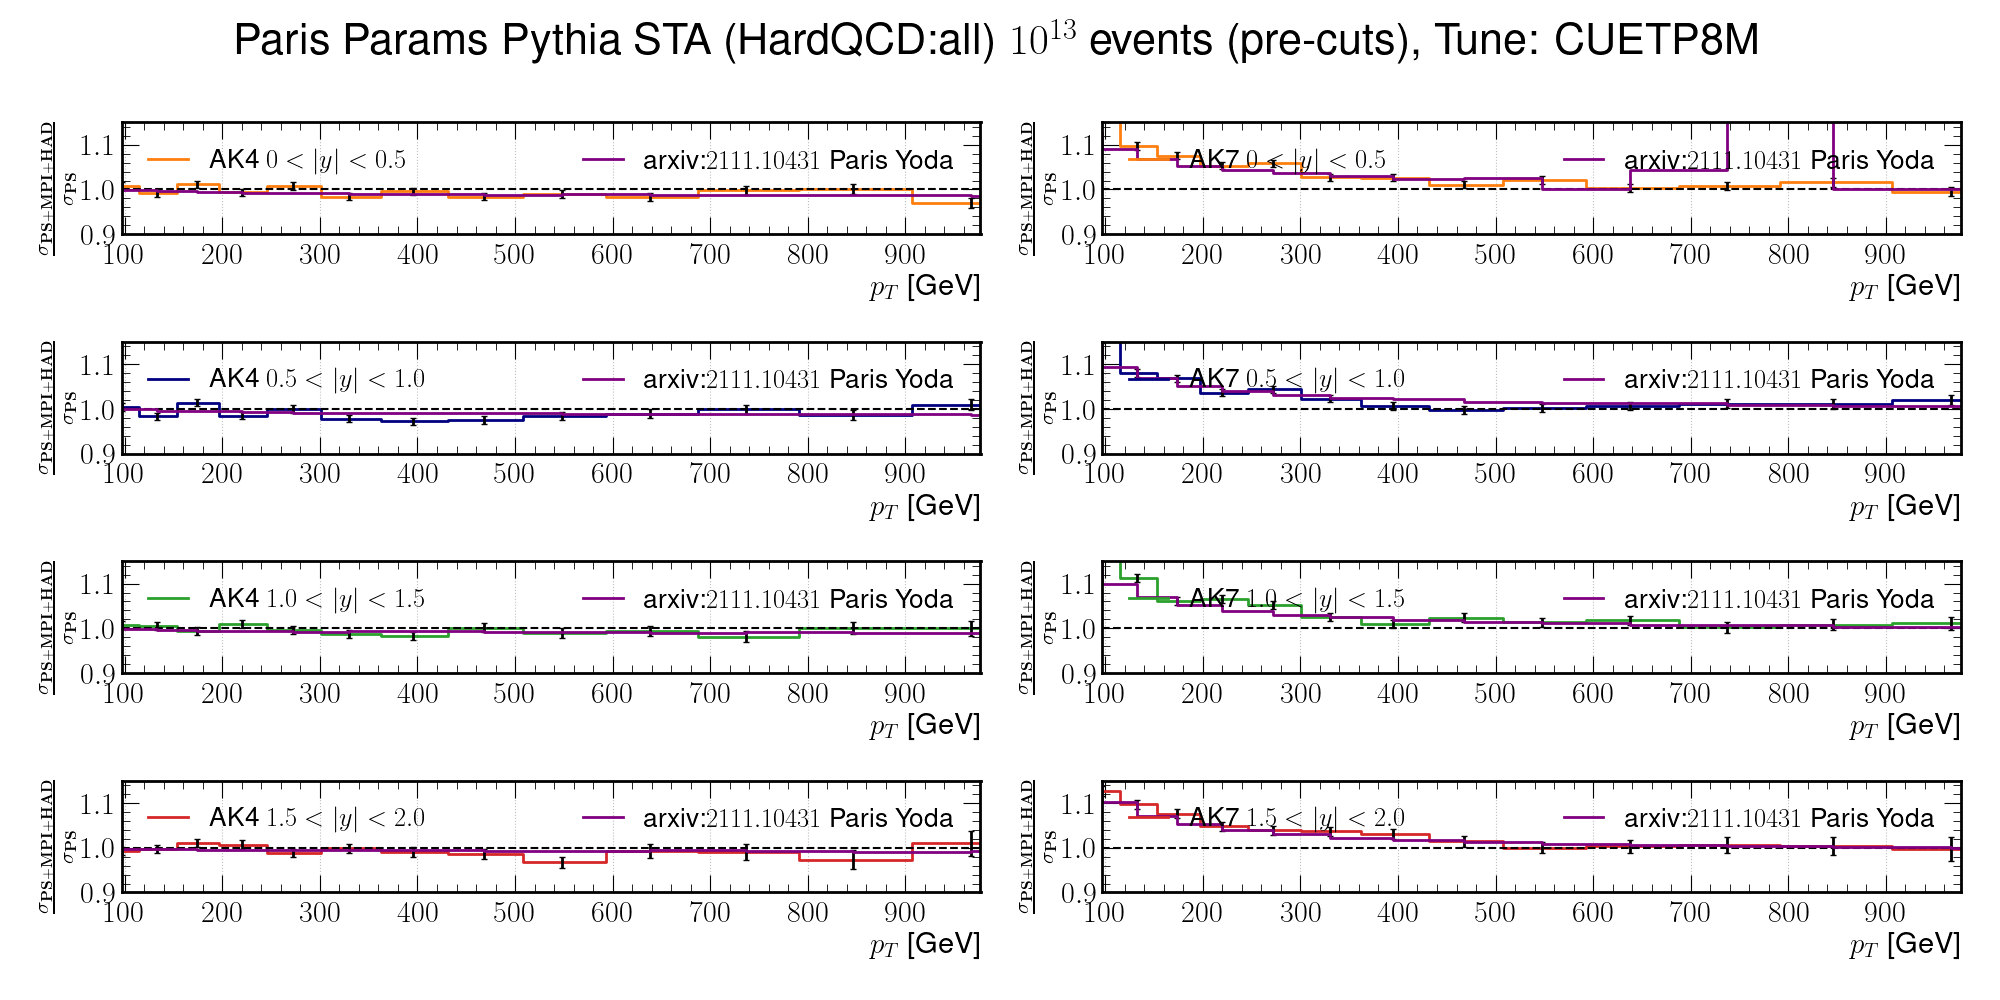

In [7]:
Image('/home/ali/Desktop/Pulled_Github_Repositories/NPCorrection_InclusiveJets/rivet+pythia/PYTHIA_STANDALONE/Paris_CUETP8M_10T/ALLBINS_Paris_Params_HardQCD_Paris_CUETP8M_10T_PYTHIA_STANDALONE_CUETP8M.png', height=600,width=1200
)

It's interesting to note that 
* the NP corrections are considerable for AK7 but pretty much negligible (or actually slightly less than 1) for AK4, so there must be a cone size (say 0.5) in which NPs are completely negligible
* The fact that the corrections low $p_T$ for AK7 are > 1 implies that the spectrum is steeps for post-hadronization than pre-hadronization. If you have a steeply falling spectrum, there is higher probability for events to migrate from low to higher pT than for events to migrate from high pT to lower pT; therefore the spectrum should soften.
* MPI cause there to be more low-$P_T$ jets than if there were no MPI. 
* Combining the two points above, i.e. that hadronization is like a smearing effect that softens the spectrum and MPI causing low-pT jets, then $\frac{\sigma_{PS+HAD}}{\sigma_{PS}}$ for AK7 should look like the one for AK4.

It is not surprising that the corrections are different for AK4 than for AK7 (for AK7 they're about 5X larger), because:
* The larger the cone size, the fewer the number of jets, because the jets will take more particles so there will be fewer particles left over to create jets.
* A jet is always defined to have a $p_T^{jet}$ threshold, where $p_T^{jet} = \sum_{i} p_T^{parton}$ is the sum over the constinuents of the jets. It is more likely for an AK7 jet to pass the threshold than an AK4, since it has more partons.


We want to choose a curve that goes to 1 at high pt. The precision is highest at low pT, as indicated by:


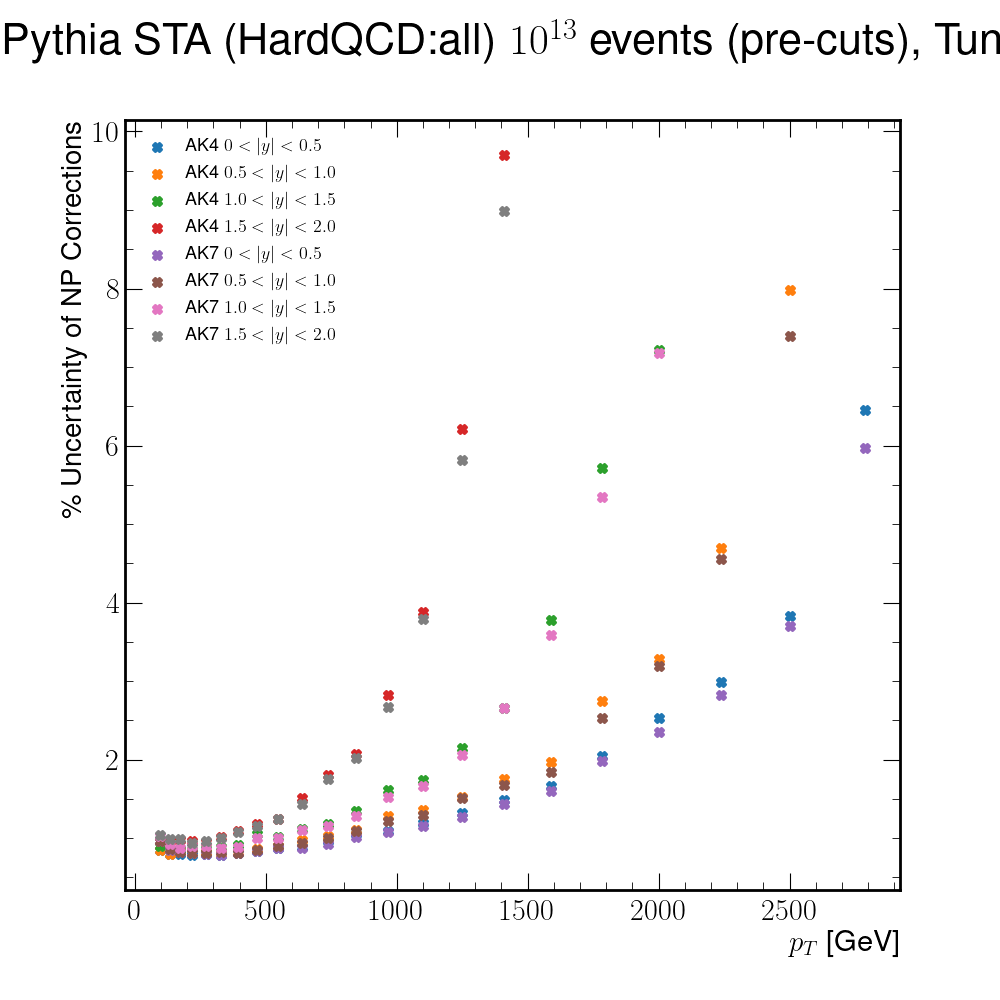

In [9]:
Image('/home/ali/Desktop/Pulled_Github_Repositories/NPCorrection_InclusiveJets/rivet+pythia/PYTHIA_STANDALONE/Paris_CUETP8M_10T/errs_allbins.png',height=400,width=400)

Therefore the accuracy is best at low $p_T$ and hence the function that we fit will be anchored by the values at low $p_T$. Therefore, we can fit the whole $p_T$ range, i.e. go as hig as we want in $p_T$.
For example, if we use $\chi^2$ as the goodness of fit (cost func) then it will be dominated by the values at low $p_T$

The function they choose in [the previous measurement](https://arxiv.org/pdf/2111.10431.pdf) is

$f \left( p_T; \vec{\theta} \right) = a_0 + \frac{a_1}{p_T^{a_2}}$

Currently, we are taking the NP corrections as a ratio of counts. Let's think of one $p_T$ bin, say the bin $i$ where $p_T \in [97, 133]$ GeV. Then the NP Correction in bin $i$ is
<font size="4">
$NPC^i = \frac{\sigma_{PS+MPI+HAD}^i}{\sigma_{PS}^i} \approx \frac{N_{PS+MPI+HAD}^i}{N_PS^i} = \frac{N_{\alpha,i}}{N_{\beta,i} }$,

where the last equality was just a renaming for convenience. However, since the data is composed of poisson-distributed counts in the numerator and denomenator in bin $i$, i.e.
<font size="4">
$$\sigma_{PS+MPI+HAD}^i = \frac{e^{-\alpha_i} \alpha_i^{N_{\alpha,i}} }{N_{\alpha,i} !} $$
$$\sigma_{PS}^i = \frac{e^{-\beta_i} \beta_i^{N_{\beta,i}} }{N_{\beta,i} !} $$;

And hence the likelihood is 
<font size="6">
$$ L = \frac{\frac{e^{-\alpha_i} \alpha_i^{N_{\alpha,i}} }{N_{\alpha,i} !}}{\frac{e^{-\beta_i} \beta_i^{N_{\beta,i}} }{N_{\beta,i} !}}$$

Where $\alpha_i$ and $\beta_i$ are the mean counts in bin $i$ in the numerator and denominator, respectively. What we really want to estimate is the mean count of the ratio in bin $i$: $r_i = \frac{\alpha_i}{\beta_i}$. We can rewrite the likelihood in terms of this parameter by $\alpha_i = r_i \beta_i$
<font size="6">
$$ L (r_i, \beta_i) = \frac{\frac{e^{-r_i \beta_i} (r_i \beta_i)^{N_{\alpha,i}} }{N_{\alpha,i} !}}{\frac{e^{-\beta_i} \beta_i^{N_{\beta,i}} }{N_{\beta,i} !}}$$

    
Where now $r_i$ is the parameter of interest and $\beta_I$ is a nuissance parameter. We can profile the likelihood over the nuissance parameter and get $L (r_i, \hat{\beta_i} )$
Doing a fit over the whole range (naive)

</font>


# Lets do a $\chi^2$ (naive) fit in the first AK4 rapidity bin over the first 4 pt bins

$\chi^2 = \sum_{i=1}^N \frac{(y_i - f(x_i) )^2 }{\delta_{y_i}^2}$

Where $x_i$ is the histogram bin minpoints (of the ratio), $y_i$ are the values, $\delta_{y_i}$ are the uncertainties.

[115.  153.5 197.  260. ]


Text(0, 0.5, 'NPC')

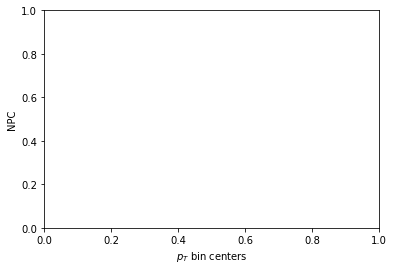

In [68]:
edges_y0 = np.array([97,  133,  174,  220,300 ])
# edges_y0 = [float(item.replace('\s',',')) for item in edges_y0.split()]
bin_centers_y0 = (edges_y0[:-1]+edges_y0[1:])/2
# pre4_y0=[1.163744e+04 2.642488e+03 7.098741e+02 2.178400e+02]
# post4_y0=[1.173045e+04 2.618880e+03 7.179274e+02 2.164112e+02]
NPC4_y0 = np.array([1.00799231, 0.991066,   1.01134469, 1.2, 1.1])
error_NPC4_y0=np.array([0.00850679, 0.00801902, 0.00830804])
# NPCy0 = [float(item.replace('\s', ',')) for item in NPC_y0.split()]
# plt.scatter(bin_centers_y0, NPC4_y0)

# print(edges_y0.shape, NPC_y0.shape)
data = Namespace()
data.n = NPC_y0
data.edges = edges_y0
print(bin_centers_y0)
plt.xlabel('$p_T$ bin centers'); plt.ylabel('NPC')

In [5]:
from scipy.optimize import curve_fit
curve_fit?

Signature:
curve_fit(
    f,
    xdata,
    ydata,
    p0=None,
    sigma=None,
    absolute_sigma=False,
    check_finite=True,
    bounds=(-inf, inf),
    method=None,
    jac=None,
    **kwargs,
)
Docstring:
Use non-linear least squares to fit a function, f, to data.

Assumes ``ydata = f(xdata, *params) + eps``.

Parameters
----------
f : callable
    The model function, f(x, ...). It must take the independent
    variable as the first argument and the parameters to fit as
    separate remaining arguments.
xdata : array_like or object
    The independent variable where the data is measured.
    Should usually be an M-length sequence or an (k,M)-shaped array for
    functions with k predictors, but can actually be any object.
ydata : array_like
    The dependent data, a length M array - nominally ``f(xdata, ...)``.
p0 : array_like, optional
    Initial guess for the parameters (length N). If None, then the
    initial values will all be 1 (if the number of parameters for the
    func

In [19]:
def model(x, *pars):
    a0, a1, a2  = pars
    return a0 + a1/(x**a2)

initial_guess = (1,1,1) # initial guess for a0, a1, a2

#toy data
pt_range = np.linspace(10,3000, 22)
num_toy = np.random.exponential(100,size=22)*2
#this is like the poisson counts in each pt bin
den_toy = np.random.exponential(100,size=22)

NPC_toy, edges = np.histogram(num_toy/den_toy, bins=22)
# params, paramcov = curve_fit(model, 
#                              xdata=edges_y0, 
#                              ydata= NPC4_y0, 
#                              p0=initial_guess, 
#                              # sigma=error_NPC4_y0
#                             )

edges_centers=(edges[:-1]+edges[1:])/2

In [16]:
##TRY TOY DATA
params, paramcov = curve_fit(model, 
                             xdata=pt_range, 
                             ydata= NPC_toy, 
                             p0=initial_guess, 
                             # sigma=error_NPC4_y0
                            )

/home/ali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


calculate $\chi^2$ (for now with uncertainies equal to 1) and $\nu$


$\nu = N - N_f$ 

Where $N$ is the number of bins and $N_f=3$ is the number of parameters in our model 

In [22]:
uncertainties = np.ones_like(pt_range)
chi2 = np.sum((NPC_toy - model(edges_centers, *params) )**2 )
nu=len(edges_centers) - len(params)
print(nu)

19


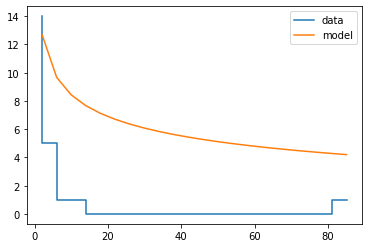

In [24]:
plt.step(edges_centers, NPC_toy, label='data')
plt.plot(edges_centers, model(edges_centers, *params), label='model')
plt.legend()

-----
# Using iminuit

In [45]:
x=NPC_y0

def model(x, a0, a1, a2):
    return a0 + a1/(x**a2)

In [46]:
cost.ExtendedBinnedNLL?

Init signature: cost.ExtendedBinnedNLL(n, xe, scaled_cdf: Callable, verbose: int = 0)
Docstring:     
Binned extended negative log-likelihood.

Use this if shape and normalization of the fitted PDF are of interest and the data
is binned.
Init docstring:
Initialize cost function with data and model.

Parameters
----------
n : array-like
    Histogram counts. If this is an array N x 2, it is interpreted as pairs of
    sum of weights and sum of weights squared.
xe : array-like
    Bin edge locations, must be len(n) + 1.
scaled_cdf : callable
    Scaled Cumulative density function of the form f(xe, par0, [par1, ...]),
    where `xe` is a bin edge and `parN` are model parameters.
verbose : int, optional
    Verbosity level. 0: is no output (default).
    1: print current args and negative log-likelihood value.
File:           ~/anaconda3/lib/python3.7/site-packages/iminuit/cost.py
Type:           type
Subclasses:     


In [47]:
nll = cost.ExtendedBinnedNLL(data.n, data.edges, model)

ValueError: n and xe have incompatible shapes

Instead of doing a $\chi^2$ fit, we choose to do a proper likelihood fit, which will guarantee that we are taking the statistical uncertainties into account. Once we have the covariance matrix for $\{ a_0, a_1, a_2 \}$ then we can generate many bootstrap samples and then I get the error band in the ratio

In [13]:
def poiss(n, mu):
    return (np.exp(mu) * mu**n) / np.math.factorial(n)

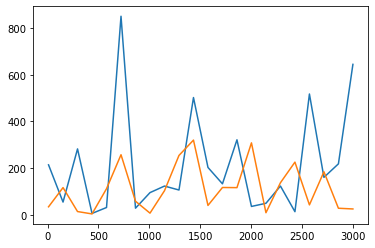

In [14]:
pt_range = np.linspace(10,3000, 22)
num_toy = np.random.exponential(100,size=22)*2
#this is like the poisson counts in each pt bin
den_toy = np.random.exponential(100,size=22)

plt.plot(pt_range, num_toy);plt.plot(pt_range, den_toy)

In [ ]:
#lets do only the first pt bin
# Define x before you define model! x=....(data)
def model(x, num_count, den_count):
    num = 